In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import time
import xgboost as xgb

# Загрузка данных
data = pd.read_csv('diabetes.csv')  # Убедитесь, что файл находится в той же директории

# Разделение на признаки и целевую переменную
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Первые 5 строк данных:")
print(data.head())
print("\nОписание данных:")
print(data.describe())
print("\nРазмеры выборок:")
print(f"Обучающая выборка: {X_train.shape}, Тестовая выборка: {X_test.shape}")

Первые 5 строк данных:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Описание данных:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618    

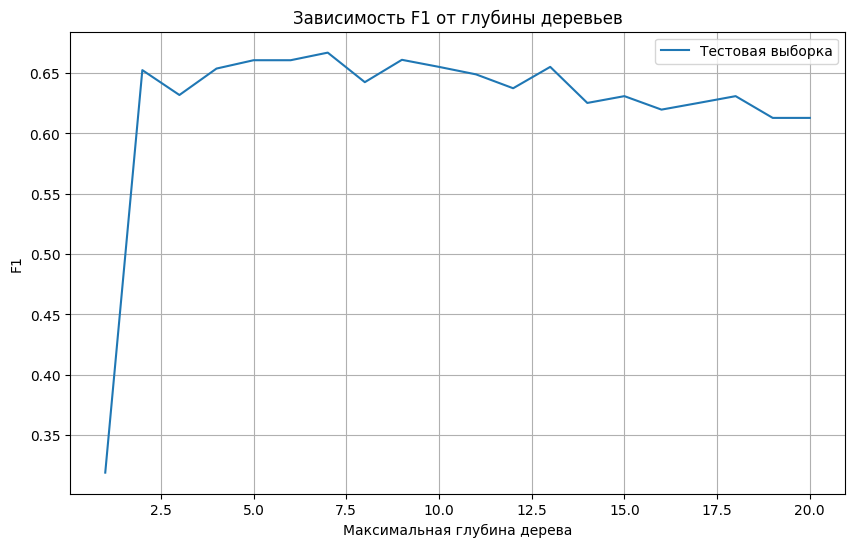

In [56]:
max_depths = range(1, 21)
test_f1 = []

for depth in max_depths:
    rf = RandomForestClassifier(max_depth=depth, random_state=42)
    rf.fit(X_train, y_train)
    
    train_pred = rf.predict(X_train)
    test_pred = rf.predict(X_test)
    
    test_f1.append(f1_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(max_depths, test_f1, label='Тестовая выборка')
plt.xlabel('Максимальная глубина дерева')
plt.ylabel('F1')
plt.title('Зависимость F1 от глубины деревьев')
plt.legend()
plt.grid()
plt.show()

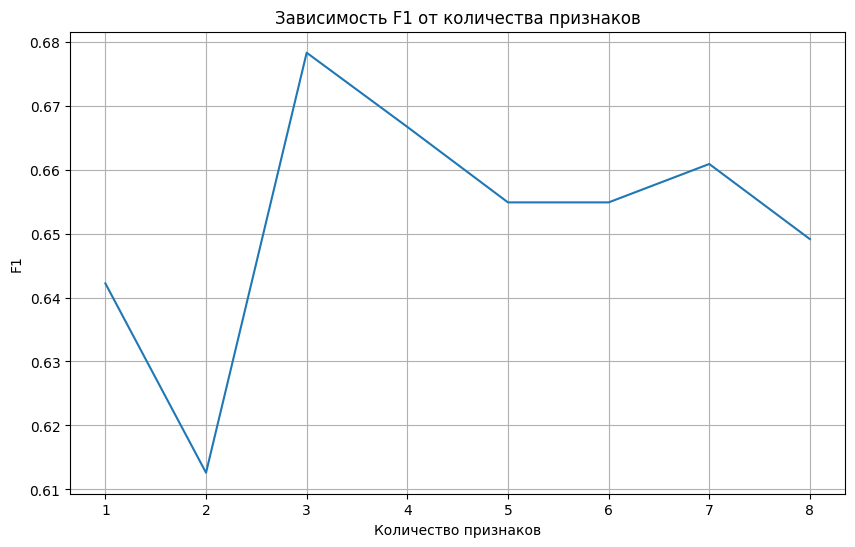

In [57]:
max_features = range(1, X.shape[1] + 1)
test_acc_features = []

for features in max_features:
    rf = RandomForestClassifier(max_features=features, random_state=42)
    rf.fit(X_train, y_train)
    
    test_pred = rf.predict(X_test)
    test_acc_features.append(f1_score(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(max_features, test_acc_features)
plt.xlabel('Количество признаков')
plt.ylabel('F1')
plt.title('Зависимость F1 от количества признаков')
plt.xticks(max_features)
plt.grid()
plt.show()


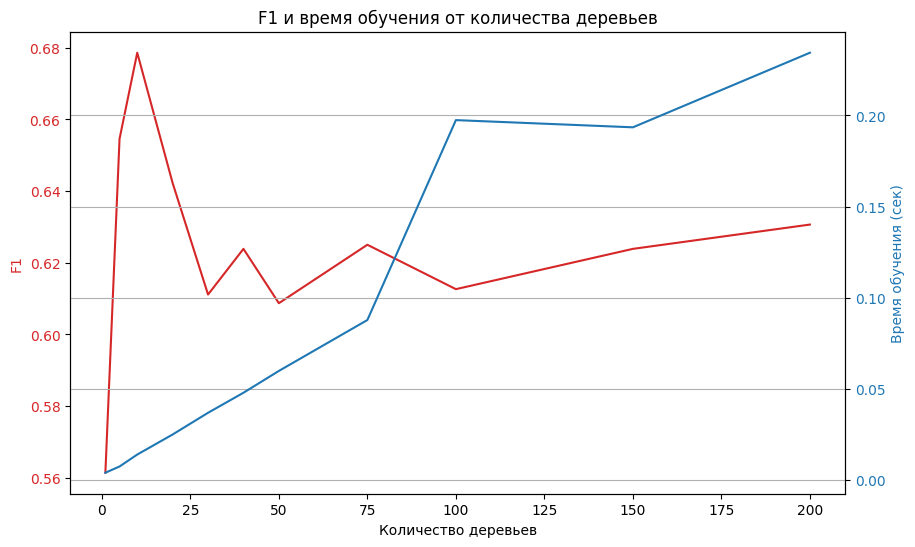

In [58]:
n_estimators = [1, 5, 10, 20, 30, 40, 50, 75, 100, 150, 200]
test_f1_trees = []
train_times = []

for n in n_estimators:
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    train_times.append(time.time() - start_time)
    
    test_pred = rf.predict(X_test)
    test_f1_trees.append(f1_score(y_test, test_pred))

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Количество деревьев')
ax1.set_ylabel('F1', color=color)
ax1.plot(n_estimators, test_f1_trees, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Время обучения (сек)', color=color)
ax2.plot(n_estimators, train_times, color=color)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('F1 и время обучения от количества деревьев')
plt.grid()
plt.show()

In [59]:
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=3, objective='binary:logistic', reg_alpha=30, reg_lambda=80, booster='dart')
start = time.time()
bst.fit(X_train, y_train)
end = time.time()

y_pred = bst.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"Точность: {acc}")
print(f"Время обучения: {end - start} секунд")

Точность: 0.7597402597402597
Время обучения: 0.004986286163330078 секунд


In [ ]:
Используя xgboost, мы получаем хорошую точность за короткий промежуток времени по сравнению с случайными деревьями
Однако они показывают увеличение точности модели с ростом количества деревьев, но тогда мы получаем увеличенное время обучения